# Caso de Estudio 2

#### El objetivo del caso es identificar la cantidad de producción de máquinas óptimo para maximizar las ganancias

La primera máquina (Bodyplus 100) constaba de estas variables

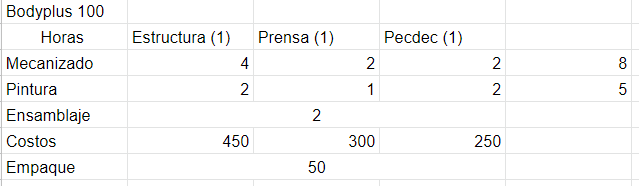

La segunda máquina (Bodyplus 200) constaba de estas variables

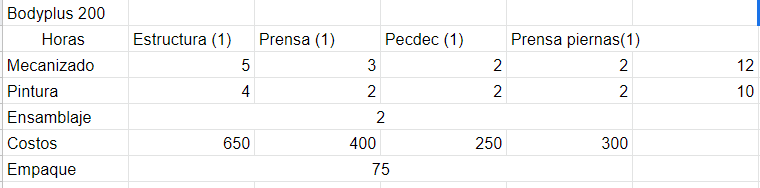

La función objetivo se construye del costo de elaboración de cada máquina y el precio al que será vendida
El precio de venta de la bodyPlus 100 es de 2400 y el de la bodyPlus 200 es de 3500

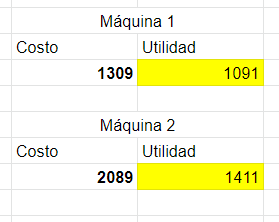

Se importan librerías para resolver los procedimientos. Utilizamos sympy para resolver matrices, numpy y matplotlib para graficar

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Eq, solve_linear_system, Matrix
from numpy import linalg
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [3]:
# La función sacarVariables recibe como parámetro un texto que contiene cualquier tipo de funcion.
#  Lo que hace es descomponerla en variables para ingresarlas a los sistemas matriciales

## El input siempre debe ser de la forma: ax + by = c

def sacarVariables(funcion):
    xComp=''
    yComp=''
    rComp=''
    sComp=''
    temp=True
    tempp=True
    for i in funcion:
        if i=='<' or i=='>':
            sComp+=i
        else:
            if not i=='+' and not i=='-' and not i=='=':
                if i!='x':
                    if temp:
                        xComp+=i
                    else:
                        if i!='y':
                            if tempp:
                                yComp+=i
                            else:
                                rComp+=i
                        else:
                            tempp=False
                else:
                    temp=False   
    return [xComp, yComp, rComp, sComp]

Se hace pedido de ingreso de la funcion objetivo. Debe estar en la forma ax + by. Las variables quedan guardadas para ser evaluadas al final en otra funcion

In [26]:
x,y=sp.symbols('x y')

# Sacar valores de la funcion objetivo para evaluarla automaticamente

# 1091x+1411y es la funcion objetivo del caso. Viene de las utilidades de las maquinas
print('Inserte funcion objetivo')
fo = input()

xF=int(sacarVariables(fo)[0])
yF=int(sacarVariables(fo)[1])

# 40x+65y

# 4x+3y

funcion_objetivo= Eq(xF*x + yF*y)
display(funcion_objetivo)

Inserte funcion objetivo


 4x+3y


Se hace pedido de las restricciones que compondrán la región factible del problema. Este programa soporta un máximo de tres restricciones. 
Cada restricción es evaluada en la función sacarVariables para obtener el valor de cada término en la misma y evaluarlo en el sistema de matrices.

In [27]:
# El ingreso debe ser de la forma ax + by (<, >)= c

# 8x+12y<=600 representa la restriccion de las horas de mecanizado
e1=sacarVariables(input('Inserte la primera restriccion'))
r1 = Eq(int(e1[0])*x+int(e1[1])*y,int(e1[2]))

# 5x+10y<=450 representa la restriccion de las horas de pintura
e2=sacarVariables(input('Inserte la segunda restriccion'))
r2 = Eq(int(e2[0])*x+int(e2[1])*y,int(e2[2]))

# 2x+2y<=140 representa la restriccion de las horas de ensamblaje
e3=sacarVariables(input('Inserte la tercera restriccion'))
r3 = Eq(int(e3[0])*x+int(e3[1])*y,int(e3[2]))


# 1x+4y<=48
# 3x+4y<=64
# 4x+2y<=62

# 4x+2y<=60
# 2x+4y<=48
# 0x+0y<=0

# mostrar la ecuacion
display(r1)
display(r2)
display(r3)

# creacion de filas para matrices
row1=[e1[0], e1[1], e1[2]]
row2=[e2[0], e2[1], e2[2]]
row3=[e3[0], e3[1], e3[2]]

Inserte la primera restriccion 4x+2y<=60
Inserte la segunda restriccion 2x+4y<=48
Inserte la tercera restriccion 0x+0y<=0


True

Se hace una lista de los puntos a considerar ya que a pesar de ser intersecciones algunos no cumplen con todas las restricciones (se encuentran fuera de la región factible). El punto se agrega a dicha lista si cumple con todos los parámetros descritos en la función considerarPunto

In [28]:
puntosConsiderados=[]

def considerarPunto(x, y):
    ans=True
    
    # restriccion 1
    if e1[3]=='<':
        if int(e1[0])*x+int(e1[1])*y <= int(e1[2]):
            pass
        else:
            ans=False
            print('no cumple restriccion 1')
    else:
        if int(e1[0])*x+int(e1[1])*y >= int(e1[2]):
            pass
        else:
            ans=False
            print('no cumple restriccion 1.0')
        
    # restriccion 2
    if e2[3]=='<':
        if int(e2[0])*x+int(e2[1])*y <= int(e2[2]):
            pass
        else:
            ans=False
            print('no cumple restriccion 2')
    else:
        if int(e2[0])*x+int(e2[1])*y >= int(e2[2]):
            pass
        else:
            ans=False
            print('no cumple restriccion 2.0')
    
    # restriccion 3
    if e3[3]=='<':
        if int(e3[0])*x+int(e3[1])*y <= int(e3[2]):
            pass
        else:
            ans=False
            print('no cumple restriccion 3')
    else:
        if int(e3[0])*x+int(e3[1])*y >= int(e3[2]):
            pass
        else:
            ans=False
            print('no cumple restriccion 3.0')
        
    if ans==True:
        puntosConsiderados.append((x, y))
    return ans

La función funcionObjetivo evalúa el punto en la función objetivo y retorna el resultado de dicha evaluación y el punto que se ingresó. Si el punto evaluado no se encuentra dentro de la región factible el resultado de la evaluación en la formula será 0 para no ser tomado en cuenta como uno de los puntos óptimos

In [29]:
# recibo par de puntos en la variable answer, se separan en x, y para evaluarse con los valores de la funcion objetivo

def funcionObjetivo(answer):    
    answers = [ v for v in answer.values() ]
    x = answers[0]
    y = answers[1]
    
    # si el punto cumple con todas las restricciones se retorna con sus valores correspondientes
    if considerarPunto(x, y):
        return [xF*x + yF*y, (x,y)]
    else:
        # al no cumplir con las restricciones se retorna con utilidades=0
        return [0, (x,y)]

Se combinan las restricciones y se resuelve su intersección. Su resultado se evalua en la funcion objetivo y se lista en puntosConsiderados al cumplir con todos los requisitos

In [30]:
print('---------------Solucion 1-----------------')
system3=Matrix((row2,row3))
display(system3)
respuesta1 = funcionObjetivo(solve_linear_system(system3,x,y))
solve_linear_system(system3,x,y)

---------------Solucion 1-----------------


⎡2  4  48⎤
⎢        ⎥
⎣0  0  0 ⎦

IndexError: list index out of range

In [31]:
print('---------------Solucion 2-----------------')

system = Matrix((row1,row2))
display(system)
respuesta2 = funcionObjetivo(solve_linear_system(system,x,y))
solve_linear_system(system,x,y)

---------------Solucion 2-----------------


⎡4  2  60⎤
⎢        ⎥
⎣2  4  48⎦

In [32]:
print('---------------Solucion 3-----------------')
system2=Matrix((row1,row3))
display(system2)
respuesta3 = funcionObjetivo(solve_linear_system(system2,x,y))
solve_linear_system(system2,x,y)

---------------Solucion 3-----------------


⎡4  2  60⎤
⎢        ⎥
⎣0  0  0 ⎦

IndexError: list index out of range

Al haber evaluado todos los puntos válidos en la funcion objetivo se comparan entre sí para buscar el máximo y proveer su utilidad y el punto en el que se encuentra

In [35]:
print('Los puntos dentro de la región factible son: ',puntosConsiderados)


# comparar utilidades de los puntosConsiderados

maximo=0
if respuesta1[0]>maximo and respuesta1[1] in puntosConsiderados:
    maximo=respuesta1[0]
    punto=respuesta1[1]
if respuesta2[0]>maximo and respuesta2[1] in puntosConsiderados:
    maximo=respuesta2[0]
    punto=respuesta2[1]
if respuesta3[0]>maximo and respuesta3[1] in puntosConsiderados:
    maximo=respuesta3[0]
    punto=respuesta3[1]


print('El punto es ', punto, ' y la ganancia maxima es ', maximo)

Los puntos dentro de la región factible son:  [(12, 6)]
El punto es  (12, 6)  y la ganancia maxima es  66


In [37]:
# Análisis de Sensibilidad

# pendiente del constraint 1 8x+12y<=600; -8/12 
# pendiente del constraint 2 5x+10y<=450; -5/10



# usamos estos constraints porque en ellos se encuentra el punto 30, 30

# para c1

#sacamos las pendientes de las restricciones que conforman el punto optimo
m1 = -int(e1[0])/int(e1[1])
m2 = -int(e2[0])/int(e2[1])

#multiplicamos la pendiente con el valor de la Fo de Y
c11 = -m1*yF
c12 = -m2*yF

#c1 es el valor máximo que puede tomar la constante que acompana a X y c12 el minimo
print('Primer rango c1 es de ', c11, ' y ', c12)

print(xF, yF)

# para c2
#dividimos la pendiente con el valor de la Fo de X
c21 = -xF/m1
c22 = -xF/m2

#c1 es el valor máximo que puede tomar la constante que acompana a Y y c12 el minimo

print('Segundo rango c2 es de ', c21, ' y ', c22)

Primer rango c1 es de  6.0  y  1.5
4 3
Segundo rango c2 es de  2.0  y  8.0


In [ ]:
# La respuesta del 1 (8,10)
#    16.25 <= C1 <= 48.75
#    53.33 <= C2 <= 160
# https://www.youtube.com/watch?v=nTXdKjQhPYY


# La respuesta del 2 (12,6)
#    1.5 <= C1 <= 6
#    2 <= C2 <= 8
# https://www.youtube.com/watch?v=rACFwIt2szk

Ecuaciones mostradas como funciones con x como variable independiente.

In [38]:
fx =lambda x : (int(e1[2])-int(e1[0])*x)/int(e1[1])
gx=lambda x : (int(e2[2])-int(e2[0])*x)/int(e2[1])
hx=lambda x: (int(e3[2])-int(e3[0])*x)/int(e3[1])
qx= lambda x: 1/3*x

Array que muestra espacio establecido en intervalo establecido (inicio, punto final, espacio entre ambos)

In [39]:
x=np.linspace(0,60,60)

Función de valores del array: se aplica función y se obtiene valores en x.

In [40]:
aa=fx(x)
bb=gx(x)
cc=hx(x)
dd=qx(x)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


#### Se imprime gráfica con matplot:
####   plt.plot(variable independiente, valor de la función en dicho punto, propiedad)
#### Se establecen propiedades de gráfica:
#### Título, color, estilo de línea, etc.
#### Se muestra gráfica mostrando punto para optimización dentro de región factible.

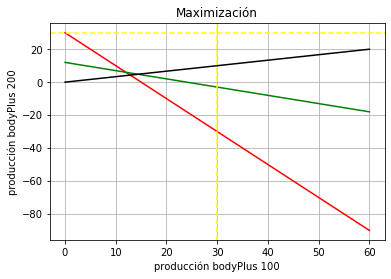

In [41]:
plt.plot(x,aa, color='red')
plt.plot(x,bb,color='green')
plt.plot(x,cc,color='blue')
plt.plot(x,dd,color='black')
plt.axhline(30, color='yellow',linestyle='--')
plt.axvline(30, color='yellow',linestyle='--')
plt.xlabel('producción bodyPlus 100')
plt.ylabel('producción bodyPlus 200')
plt.title('Maximización')
plt.grid()